In [134]:
import pandas as pd
import numpy as np

# Give path to train and test data
train_data=pd.read_csv("../data3/train.csv")
test_data=pd.read_csv("../data3/test.csv")

# Splitting the train data to check underfitting/overfitting etc.

# The train - test split ratio has been choosen to be 1:1, a little bizarre but this had to be done given the short 
# size of the dataset(400 points). Else, the optimum value of degree fluctuates a lot depending on how the data is 
# shuffled (without setting a seed for random algorithm).

train=train_data.sample(frac=0.5, random_state=25 )
test=train_data.drop(train.index)

In [135]:
# Separating columns X and Y for both train and test dataset
Y=np.array(train)[:,2]
X=np.array(train)[:,1].reshape(-1,1)
Y_test=np.array(test)[:,2]
X_test=np.array(test)[:,1]

def trainModel(m, X, Y):
    # fits X containing n samples with Y for a given degree of polynomial m
    # returns least square estimator of the coefficients of polynomial
    indices=np.arange(0, m+1).reshape(1,-1)
    X=X**indices # computes upto m powers of data X

    # least square estimate is obtained by 
    # B=(X'X)^-1.(X'Y)  (X' is X.Transpose())
    XtX=np.matmul(X.transpose(),X)
    XtY=np.matmul(X.transpose(),Y)
    B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)
    return B

def resultingPolynomial(B, X):
    # polynomial regression estimation of Y
    # B is array of coefficients
    m = B.size - 1 
    X_poly = np.vander(X.flatten(), m+1, increasing=True)  #Generate a Vandermonde matrix.
    # The columns of the output matrix are powers of the input vector. 

    Y_estimated = np.matmul(X_poly, B) 
    return Y_estimated


def sumSquareResiduals(B, X, Y):
    # residual=Y_est-Y_i
    # sum of square of residual is an error metric
    Y_est_test = resultingPolynomial(B, X) 
    return np.sum((Y - Y_est_test) ** 2)


def findBestFit(X, Y):
    # finds the value of m which gives the best fit for the data by minimizing SSR
    minM=0
    minSSR=np.infty
    arrayB=[] # stores estimated coefficients of polynomial for different m's

    for i in range(1, 51): # m from 1 to 50
        B=trainModel(i, X, Y)
        SSR=sumSquareResiduals(B, X_test, Y_test)
        # print(SSR)
        arrayB.append(B)
        if SSR<minSSR:
            minSSR=SSR
            minM=i
    return minM, arrayB[minM-1], arrayB[minM-2], arrayB[minM]
    # return best m, bestfit B, underfit B, overfit B

bestM, bestB, underfitB, overfitB = findBestFit(X, Y)
print(f"Best degree of polynomial: {bestM}")
print(f"Underfit SSR: {sumSquareResiduals(underfitB, X_test, Y_test)}")
print(f"Bestfit SSR: {sumSquareResiduals(bestB, X_test, Y_test)}")
print(f"Overfit SSR: {sumSquareResiduals(overfitB, X_test, Y_test)}")

Best degree of polynomial: 5
Underfit SSR: 115831.93527550294
Bestfit SSR: 109994.89158567907
Overfit SSR: 113291.4744752036



Extension to multiple features

In [136]:
## FOR MULITPLE REGRESSION

# def train_multiple_regression(train_data):
#     # Returns least square estimator of the weights of each feature
#     Y=train_data[:,-1] 
#     X=train_data[:,:-1]
#     X=np.concatenate((np.ones_like(Y)[:, np.newaxis], X), axis=1) # add a column  of ones

#     # Least square estimate is obtained by 
#     # B=(X'X)^-1.(X'Y)  (X' is X.Transpose())
#     XtX=np.matmul(X.transpose(),X)
#     XtY=np.matmul(X.transpose(),Y)
#     B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)
#     return B

# def predict_multiple_regression(train_data, test_data):
#     # Train and predict on Test data
#     B=train_multiple_regression(train_data)
#     X_test=np.concatenate((np.ones(test_data.shape[0])[:, np.newaxis], test_data), axis=1)
#     return np.matmul(X_test, B)


# B=train_multiple_regression(train_data, features)
# Y_pred=predict_multiple_regression(test_data, features, B)

In [137]:

## FOR TESTING PURPOSES
# X_small=X[0:10]
# Y_small=Y[0:10]

# trainModel(1,X_small, Y_small)
# findBestFit(X_small, Y_small)

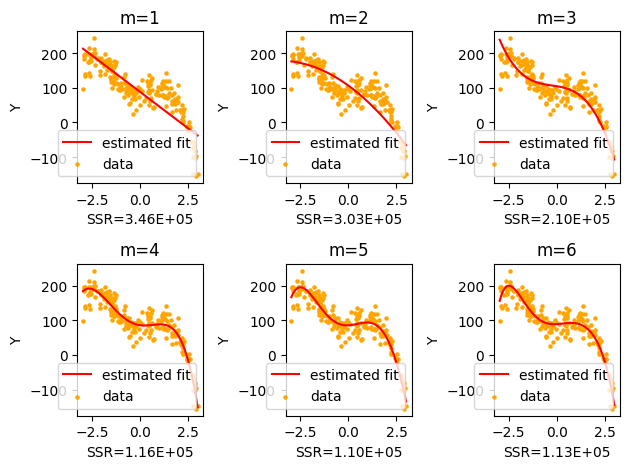

In [138]:
import matplotlib.pyplot as plt

def trainAndVisualizePerformance(i):
    # Set polynomial degree m
    m = i + 1
    # Estimate coefficients
    B = trainModel(m, X, Y)
    
    # Generate X_range for smooth plotting
    X_range = np.linspace(X_test.min(), X_test.max(), 100)
    Y_est_range = resultingPolynomial(B, X_range.reshape(-1, 1)) 
    
    # Calculate SSR using X_test
    SSR=sumSquareResiduals(B, X_test, Y_test)    

    # Plot
    plt.subplot(2, 3, i+1)
    plt.plot(X_range, Y_est_range, 'r-', label="estimated fit")  # Polynomial fit
    plt.scatter(X_test, Y_test, c='orange', s=5, label="data")  # Actual data points
    plt.title(f"m={m}")
    plt.xlabel(f"SSR={SSR:.2E}")
    plt.ylabel("Y")
    plt.legend()

# Visualize for m = 1, 2, 3, 4, 5, 6
for i in range(0, 6):
    trainAndVisualizePerformance(i)

plt.tight_layout()
plt.show()


Polynomial Degree (m): 1, SSR: 345860.24
Polynomial Degree (m): 2, SSR: 302949.13
Polynomial Degree (m): 3, SSR: 209601.32
Polynomial Degree (m): 4, SSR: 115831.94
Polynomial Degree (m): 5, SSR: 109994.89
Polynomial Degree (m): 6, SSR: 113291.47
Polynomial Degree (m): 7, SSR: 116324.63
Polynomial Degree (m): 8, SSR: 116495.22
Polynomial Degree (m): 9, SSR: 116610.21
Polynomial Degree (m): 10, SSR: 116885.30
Polynomial Degree (m): 11, SSR: 116897.79
Polynomial Degree (m): 12, SSR: 116913.54
Polynomial Degree (m): 13, SSR: 116845.55
Polynomial Degree (m): 14, SSR: 118061.41


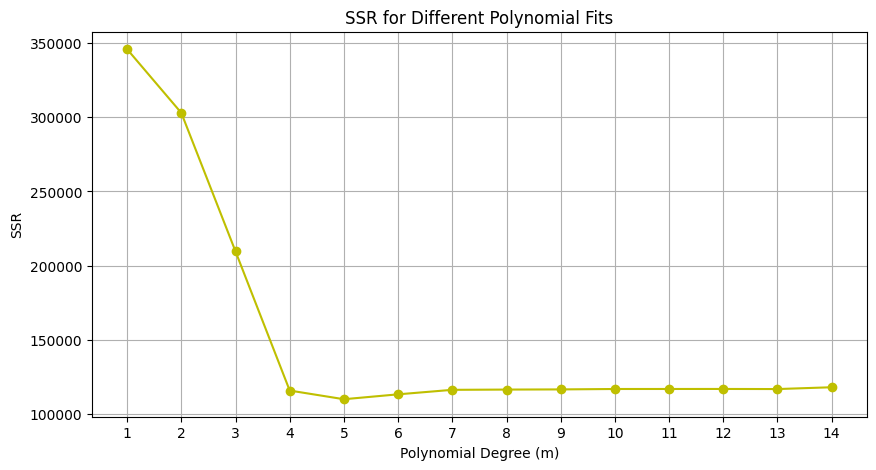

Polynomial Degree (m): 1, R^2: 0.6592
Polynomial Degree (m): 2, R^2: 0.7015
Polynomial Degree (m): 3, R^2: 0.7935
Polynomial Degree (m): 4, R^2: 0.8859
Polynomial Degree (m): 5, R^2: 0.8916
Polynomial Degree (m): 6, R^2: 0.8884
Polynomial Degree (m): 7, R^2: 0.8854
Polynomial Degree (m): 8, R^2: 0.8852
Polynomial Degree (m): 9, R^2: 0.8851
Polynomial Degree (m): 10, R^2: 0.8848
Polynomial Degree (m): 11, R^2: 0.8848
Polynomial Degree (m): 12, R^2: 0.8848
Polynomial Degree (m): 13, R^2: 0.8849
Polynomial Degree (m): 14, R^2: 0.8837


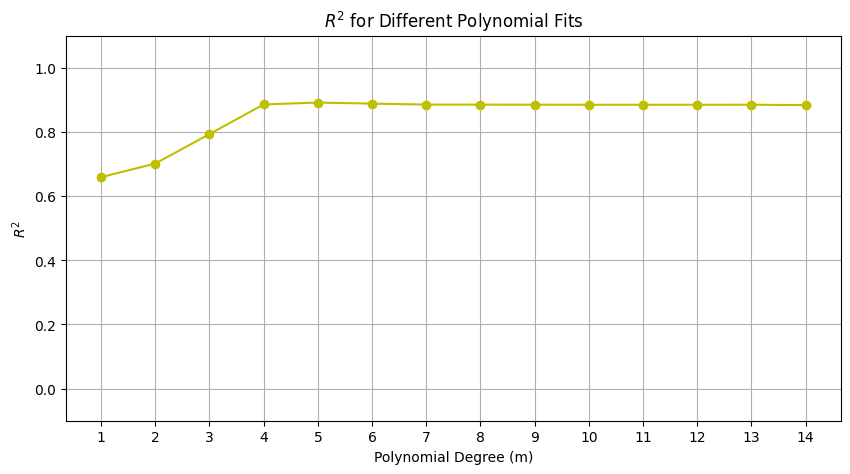

In [139]:
# Plot SSR for different fits
def visualizeSSR():
    SSR_range = []
    for i in range(1, 15):  # m from 1 to 14
        B = trainModel(i, X, Y)
        # SSR = sumSquareResiduals(B, X, Y)
        X_range = np.linspace(X_test.min(), X_test.max(), 100)
        
        # Calculate SSR using X_test
        SSR=sumSquareResiduals(B, X_test, Y_test)
        
        SSR_range.append(SSR)
        print(f"Polynomial Degree (m): {i}, SSR: {SSR:.2f}")  # Print SSR values for each degree
        
    X_range = np.arange(1, 15)
    plt.figure(figsize=(10, 5))
    plt.plot(X_range, SSR_range, 'y-', marker='o')
    plt.title("SSR for Different Polynomial Fits")
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel("SSR")
    plt.grid()
    plt.xticks(X_range)
    plt.show()
    
    return SSR_range

# Plot R^2 for different fits
def visualizeRsquare(SSR_range):
    SYY = np.sum((Y_test - Y_test.mean())**2)
    R_square = 1 - np.array(SSR_range) / SYY  # Calculate R^2
    for i in range(len(R_square)):
        print(f"Polynomial Degree (m): {i+1}, R^2: {R_square[i]:.4f}")
    
    X_range = np.arange(1, 15)
    plt.figure(figsize=(10, 5))
    plt.plot(X_range, R_square, 'y-', marker='o')
    plt.title(r"$R^2$ for Different Polynomial Fits")
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel(r"$R^2$")
    plt.grid()
    plt.xticks(X_range)
    plt.ylim(-0.1, 1.1)  
    plt.show()

# Get SSR and plot R^2
SSR = visualizeSSR()
visualizeRsquare(SSR)



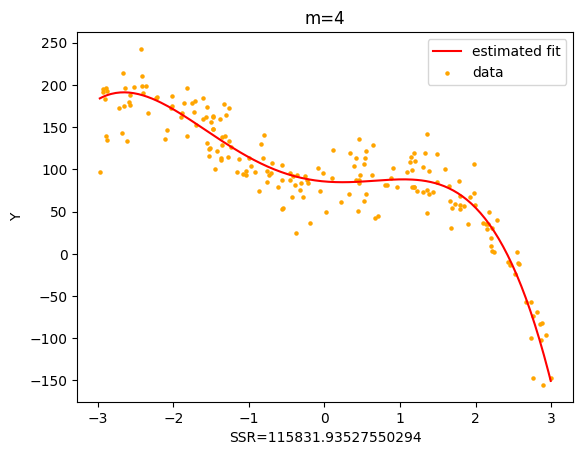

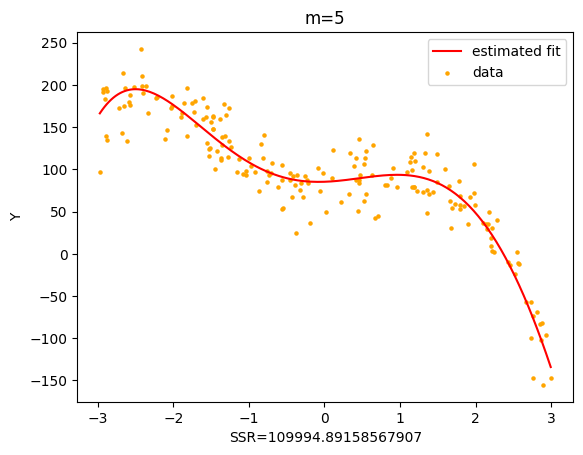

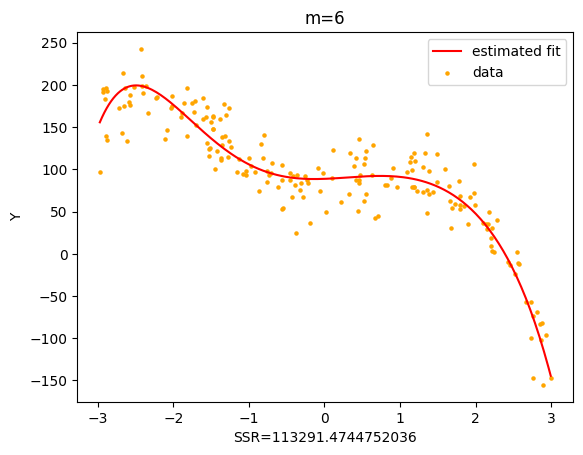

In [140]:
# Path for saving image files
save_results_to="../images/3/"

# Demonstrate underfit overfit and correctfit by plotting
def generateDifferentFits(m, B, name):
    X_range=np.linspace(X_test.min(), X_test.max(), X_test.shape[0])
    Y_est=resultingPolynomial(B, X_range.reshape(-1,1))

    # Calculate SSR using X_test
    SSR=sumSquareResiduals(B, X_test, Y_test)

    plt.plot(X_range, Y_est, 'r-', label="estimated fit")
    plt.scatter(X_test, Y_test, c='orange', s=5, label="data")
    plt.title(f"m={m}")
    plt.xlabel(f"SSR={SSR}")
    plt.ylabel("Y")
    plt.legend()
    plt.savefig(save_results_to+name)
    plt.show()

# Generate underfit, bestfit and overfit plots for data set
generateDifferentFits(bestM-1, underfitB, "3_underfit.png")
generateDifferentFits(bestM, bestB, "3_correctfit.png")
generateDifferentFits(bestM+1, overfitB, "3_overfit.png")

In [141]:
import pickle

def finalModel(m):
    # train on the whole data
    Ynew=np.array(train_data)[:,2]
    Xnew=np.array(train_data)[:,1].reshape(-1,1)

    indices=np.arange(0, m+1).reshape(1,-1)
    Xnew=Xnew**indices 

    ### B=(X'X)^-1.(X'Y)
    XtX=np.matmul(Xnew.transpose(),Xnew)
    XtY=np.matmul(Xnew.transpose(),Ynew)
    B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)

    # Save parameters 
    with open('3_weights.pkl', 'wb') as f:
        pickle.dump(np.array(B), f)
    return B

# For final prediction, train the model on best fit m and whole training data
final_B=finalModel(bestM)
final_X_test=np.array(test_data)[:,1].reshape(-1,1)
y_predict=resultingPolynomial(final_B, final_X_test)

# Save the predictions for test data
predictions=test_data.assign(y=y_predict)
predictions.to_csv("3_predictions.csv", index=False)